In [122]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm

In [111]:
def circle(r, x, h, k, how):
    if how=='n':
      return -math.sqrt(r**2 - (x-h)**2) + k
    if how=='p':
      return math.sqrt(r**2 - (x-h)**2) + k
    else:
       raise ValueError("how must be 'n' or 'p'")


def in_Fig(x,y, radio):

  fig_in= []
  
  if math.sqrt(x**2 + y**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt((x-radio)**2 + y**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt(x**2 + (y-radio)**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt((x-radio)**2 + (y-radio)**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  return all(fig_in)

In [159]:
radio = 20
mag = 50
fig = plt.figure(figsize = (5,5))
x = np.linspace(0, 20, num = radio*mag)

circle_ = lambda r, x: circle(r, x, 0, 0, 'p')
circle_x = lambda r, x: circle(r, x, r, 0, 'p')
circle_y = lambda r, x: circle(r, x, 0, r, 'n')
circle_xy = lambda r, x: circle(r, x, r, r, 'n')


circle1 = [circle_(radio, x) for x in x]
circle2 = [circle_x(radio, x) for x in x]
circle3 = [circle_y(radio, x) for x in x]
circle4 = [circle_xy(radio, x) for x in x]


<Figure size 500x500 with 0 Axes>

In [171]:
points = 1000000
xs,ys = np.random.uniform(0, radio, points), np.random.uniform(0, radio, points)
points_in,xv, yv = [], [], []

for x, y in tqdm(zip(xs,ys), total = points):
    if in_Fig(x,y, radio):
        points_in.append(True)
    else:
        points_in.append(False)
    xv.append(x)
    yv.append(y)

xv, yv = np.array(xv), np.array(yv)

  0%|          | 0/1000000 [00:00<?, ?it/s]

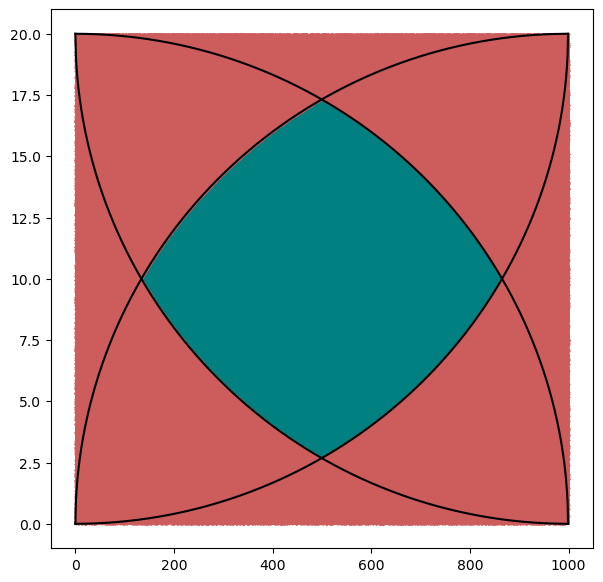

In [173]:
fig = plt.figure(figsize = (7,7))


dentro = np.where(points_in)[0]
fuera = np.where(np.logical_not(points_in))[0]

plt.plot(xv[dentro]*mag, yv[dentro], 'o', color = 'teal', markersize = 0.5)
plt.plot(xv[fuera]*mag, yv[fuera], 'o', color = 'indianred', markersize = 0.5)

plt.plot(circle1, color='black')
plt.plot(circle2, color='black')
plt.plot(circle3, color='black')
plt.plot(circle4, color='black')

In [179]:
in_prctg = len(dentro)/points
area = radio**2*in_prctg
print(f'El área de la figura es {area}u^2')

El área de la figura es 125.7464u^2
